In [1]:
#Insertion des libraires
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')
import seaborn as sns 

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Insertion des packages
df=pd.read_csv('df.csv')
df=pd.DataFrame(df,columns=['Date','Contenu','Retweet','Hashtags','utilisateur'])
df['Date']=pd.to_datetime(df['Date'])
print(df.shape)
print(df.dtypes)
print(df[:])

(482803, 5)
Date           datetime64[ns, UTC]
Contenu                     object
Retweet                      int64
Hashtags                    object
utilisateur                 object
dtype: object
                            Date  \
0      2022-10-15 23:56:38+00:00   
1      2022-10-15 23:52:53+00:00   
2      2022-10-15 23:49:40+00:00   
3      2022-10-15 23:47:44+00:00   
4      2022-10-15 23:47:17+00:00   
...                          ...   
482798 2022-02-01 01:38:34+00:00   
482799 2022-02-01 01:08:39+00:00   
482800 2022-02-01 00:37:04+00:00   
482801 2022-02-01 00:32:09+00:00   
482802 2022-02-01 00:20:38+00:00   

                                                  Contenu  Retweet  \
0       Cependant, le milliardaire aurait proposé un a...        0   
1       BREAKING ! Face au recul de l'armée russe en #...        0   
2       [Ukraine] Comment en est-on arrivé là ? Résumé...        0   
3       Mais le ministre rajoute " nous ne sommes pas ...        3   
4       @KalustD

In [3]:
### Calcul da la longueur moyenne des tweets et de la longueur moyenne des tweets par jour.

In [4]:
### Calcul de la longueur moyenne des tweets.
corpus=df['Contenu']
df['lentwitt']=[len(doc.split()) for doc in corpus]
mean_lentwitt=df['lentwitt'].mean()
print(f"la longueur moyenne des tweets est de {mean_lentwitt}")

la longueur moyenne des tweets est de 28.57470231129467


In [5]:
### Calcul de la longueur moyenne des tweet par jour. 
df=df.set_index('Date')
dflentwitt=df['lentwitt'].resample('D').agg("mean")
dflentwitt.drop(columns=['Identifiant'],inplace=True)
dflentwitt=pd.DataFrame(dflentwitt,columns=['lentwitt'])
print(dflentwitt.shape)
print(dflentwitt.head())

(257, 1)
                            lentwitt
Date                                
2022-02-01 00:00:00+00:00  27.593407
2022-02-02 00:00:00+00:00  27.903790
2022-02-03 00:00:00+00:00  28.116364
2022-02-04 00:00:00+00:00  28.357955
2022-02-05 00:00:00+00:00  27.366197


In [6]:
### Calcul du nombre moyen de tweet par jour et de la moyenne du nombre moyen de tweet journalier.

In [7]:
#Calcul du nombre moyen de tweet par jour.
df['nbtweet']=1
nb=df['nbtweet'].resample('D').agg(sum)
nb=pd.DataFrame(nb,columns=['nbtweet'])
print(nb.head())
print(nb.dtypes)
print(nb.shape)

                           nbtweet
Date                              
2022-02-01 00:00:00+00:00      273
2022-02-02 00:00:00+00:00      343
2022-02-03 00:00:00+00:00      275
2022-02-04 00:00:00+00:00      352
2022-02-05 00:00:00+00:00      213
nbtweet    int64
dtype: object
(257, 1)


In [8]:
#Calcul de la moyenne du nombre moyen de tweet journalier.
moy_jour=nb['nbtweet'].mean()
print(f" la moyenne du nombre de tweet journalier est : n/ {moy_jour} ")

 la moyenne du nombre de tweet journalier est : n/ 1878.6108949416343 


In [9]:
### Calcul du nombre de retweet moyen et du nombre moyen de retweet par jour. 

In [10]:
#Calcul du nombre moyen de retweet par jour.
Retweet=df['Retweet'].resample('D').agg('mean')
Retweet=pd.DataFrame(Retweet,columns=['Retweet'])
print(Retweet.shape)
print(Retweet.head())

(257, 1)
                            Retweet
Date                               
2022-02-01 00:00:00+00:00  7.505495
2022-02-02 00:00:00+00:00  2.953353
2022-02-03 00:00:00+00:00  4.323636
2022-02-04 00:00:00+00:00  4.536932
2022-02-05 00:00:00+00:00  3.502347


In [11]:
#Calcul de la moyenne du nombre de retweet. 
moy_retweet=df['Retweet'].mean()
print(f" le nombre moyen de retweet est {moy_retweet}")

 le nombre moyen de retweet est 6.485297315882462


In [12]:
### Visualisation du nombre moyen de twett par jour, de la longueur moyenne de tweet par jour et du nombre moyen de retweet par jour.

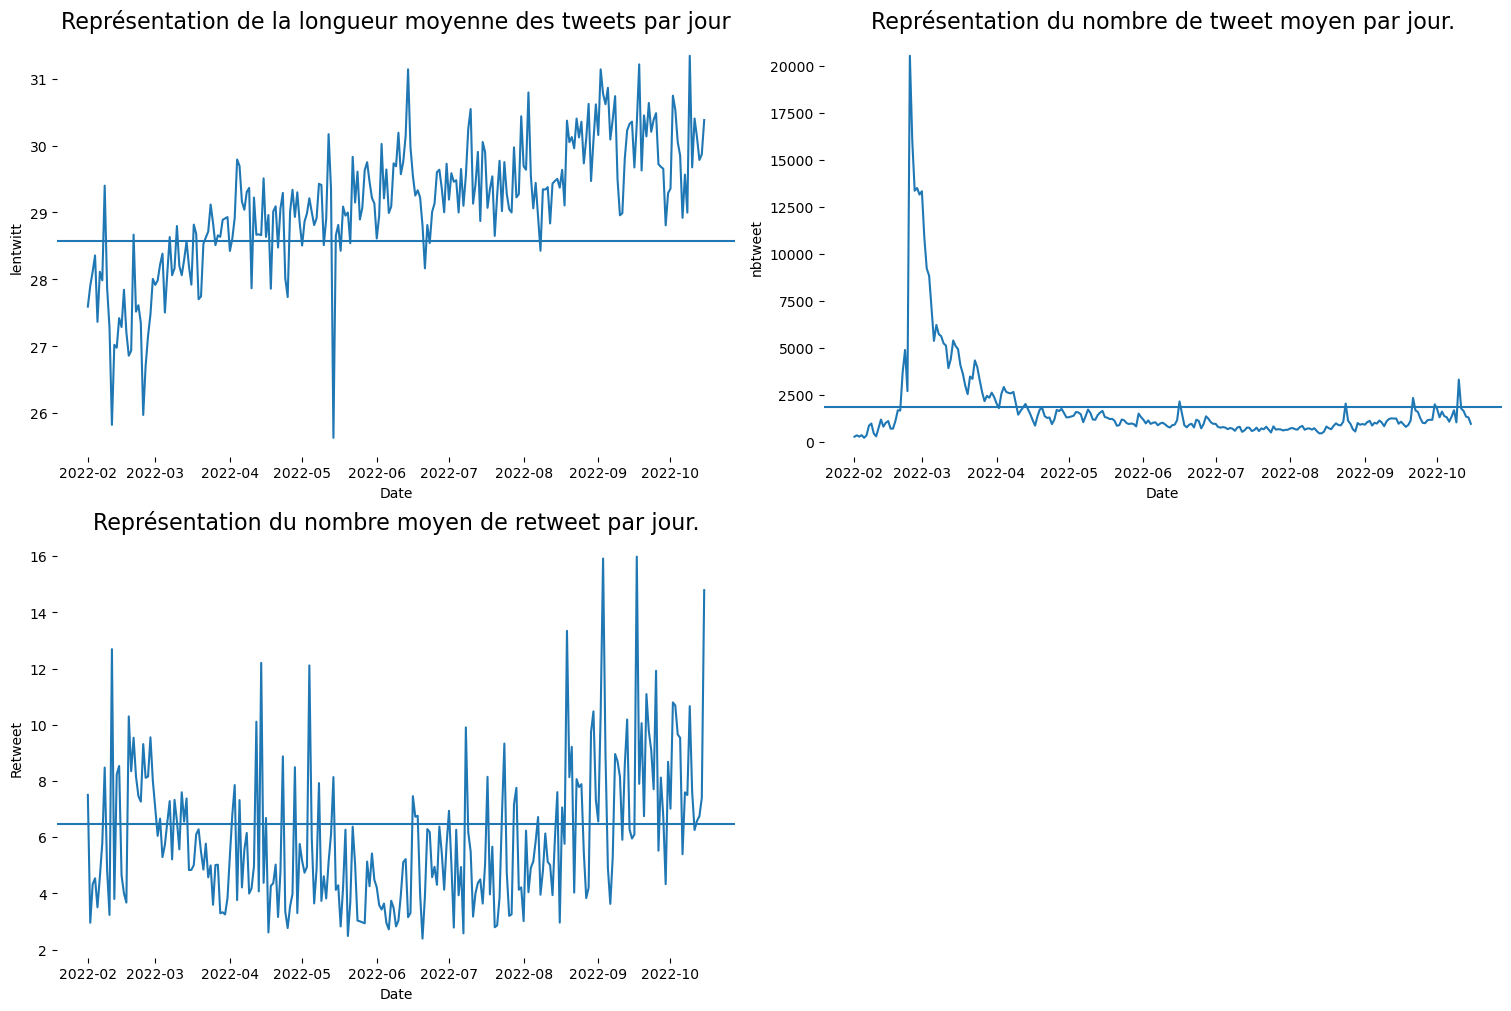

In [13]:
fig3=plt.figure(constrained_layout=True, figsize=(15,10))
gs=fig3.add_gridspec(2,2)
ax1=fig3.add_subplot(gs[0,0])
ax2=fig3.add_subplot(gs[0,1])
ax3=fig3.add_subplot(gs[1,0])

ax1=sns.lineplot(ax=ax1, x='Date',y='lentwitt', data=dflentwitt)
ax1.set_title('Représentation de la longueur moyenne des tweets par jour', loc='center', fontsize=16)
ax1.axhline(mean_lentwitt)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2=sns.lineplot(ax=ax2,x='Date',y='nbtweet',data=nb)
ax2.set_title('Représentation du nombre de tweet moyen par jour.',loc='center',fontsize=16)
ax2.axhline(moy_jour)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3=sns.lineplot(ax=ax3, x='Date',y='Retweet', data=Retweet)
ax3.set_title('Représentation du nombre moyen de retweet par jour.', loc='center', fontsize=16)
ax3.axhline(moy_retweet)
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)



In [14]:
### Parti WordCloud.

In [15]:
### Calcul de la taille du vocabulaire de corpus des hashtags
corpusH=df['Hashtags']
words=' '.join(corpusH)
words_list=words.split()
vocab=list(set(words_list))
print(f"la taille du vocab est de : {len(vocab)}")

la taille du vocab est de : 101455


In [16]:
### Calcul de la taille du vocabulaire du corpus des contenu tweeter 
corpus=df['Contenu']
words=' '.join(corpus)
words_list=words.split()
vocab=list(set(words_list))
print(f"la taille du vocab est de : {len(vocab)}")

la taille du vocab est de : 992906


In [17]:
stopwords=stopwords.words('french')

In [18]:
### Représentation par des wordcloud du contenu des tweeter et des Hashtags 

In [19]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        collocations=True,
        max_words=400,
        max_font_size=200, 
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()    

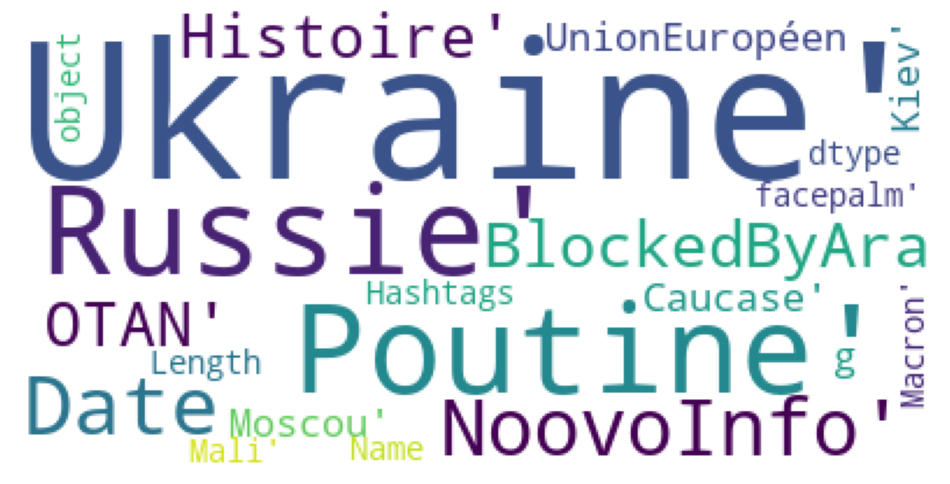

In [20]:
show_wordcloud(corpusH)

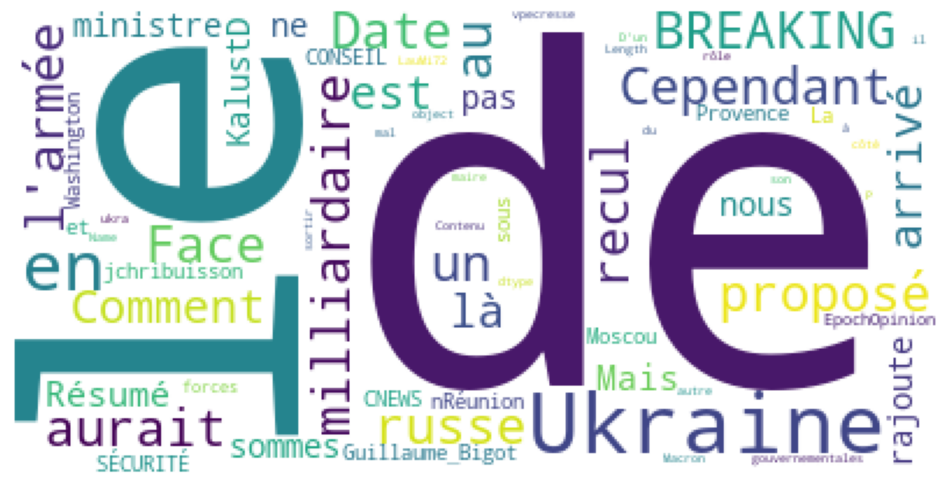

In [21]:
show_wordcloud(corpus)